# Polynomial Regression

`Features --> Polynomial tranformation --> Linear regression --> Label`



In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LinReg Class implemented earlier

In [3]:
class LinReg(object):
    '''
    Linear regression Model
    ------------------------------------
    y = X@w
    X: A feature matrix
    w: weight vector
    y; Label Vector
    '''

    def __init__(self):
        self.t0 = 200
        self.t1 = 100000

    def predict(self, X:np.ndarray) -> np.ndarray:
        ''' Prediction of ouotput label for a given input

            Args:
                X: Feature matrix of shape (n, m+1).
                w: weight vector of shape (m+1,)

            Returns:
                y: Predicted label vector of shape (n,) 

        '''

        y = X @ self.w
        return y

    def loss(self, X: np.ndarray, y: np.ndarray) -> float:
        '''Calculates loss for a model based on known labels
    
        Args:
            X: Feature matrix for given inputs
            y: Output label vector as predicted by the given model
            w: Weight vector

        Returns:
            Loss
        '''

        err = self.predict(X) - y
        return (1/2)*(np.transpose(err) @ err)

    def rmse(self, X: np.ndarray, y: np.ndarray) -> float:
        '''Calculate root mean square error of prediction wrt actual label.
        
        Args:
            X: Feature matrix for the given inputs
            y: output label vector as predicted by the given model

        Returns:
            Loss
        '''

        return np.sqrt((2/X.shape[0]) * self.loss(X, y))

    def fit(self, X:np.ndarray, y:np.ndarray) -> float:
        '''Estimates parameters of the linear regression model with normal equation.
    
        Args: 
            X: Feature matrix for given inputs.
            y: Actual label vector.

        Returns:
            Weight vector
        '''
        self.w = np.linalg.pinv(X) @ y 
        return self.w

    def calculate_gradient(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        '''Calculates gradients of loss dunction wrt weight vector on training set
    
        Arguments:

            X: Feature matrix for training data.
            y: Label vector for training data
            w: Weight vector

        Returns:
            A vector of gradients.
        '''

        return np.transpose(X) @ (self.predict(X) - y)
    
    def update_weights(self, grad: np.ndarray, lr: float) -> np.ndarray:
        '''
        Updates the weights based on the gradient of loss function.

        Weight updates are carried out with the fiollowing formula:
            w_new := w_old - lr * grad

        Args:
            1. w: Weight vector
            2. grad: gradient of loss w.r.t w
            3. lr: learning rate

        Returns:
            Updated weight vector
        '''

        return (self.w - lr*grad)

    def learning_schedule(self, t) -> float:
        lr = (self.t0) / (t + self.t1)
        return lr

    def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
        '''Estimates parameters of linear regression model through gradient descent.
    
        Arguments:
            X: Feature matrix for training data
            y: Label vector for training data
            lr: learning rate
            num_epochs: Number of training steps

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
            Weight vectors acrss different iterations
        '''
        self.w = np.zeros((X.shape[1])) # parameter vector initialised to zero
        self.w_all = [] #all paramenter across iterations
        self.err_all = [] # all arrors across iterations



        #Gradient descent loop
        for i in np.arange(0, num_epochs):

            #Gradient Calulation
            dJdW = self.calculate_gradient(X, y)

            self.w_all.append(self.w)

            #calculate arror due to the current weight vector:
            self.err_all.append(self.loss(X, y))

            #Weight vector update.
            self.w = self.update_weights(dJdW, lr)

        return self.w
    
    def mbgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, batch_size: int) -> np.ndarray:

        '''Estimates parametrs of linear regression model through gradient descent.
    
        Args:
            1. X: Feature matrix for training data.
            2. y: Label vector for training data.
            3. num_iters: Number of iterations.

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
         Weight vector acosss different iterations
        
        '''
        # Parameter vector initialised to [0,0]
        self.w = np.zeros((X.shape[1]))
        
        self.w_all = [] # all parameters across iterations.
        self.err_all = [] # error across iterations

        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i: i + batch_size]
                yi = y_shuffled[i: i + batch_size]
            
                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi))

                dJdW = 2/batch_size * self.calculate_gradient(xi, yi)

                self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
            
        return self.w
    
    def sgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int) -> np.ndarray:

        '''Estimates parametrs of linear regression model through stochastic gradient descent.
    
        Args:
            1. X: Feature matrix for training data.
            2. y: Label vector for training data.
            3. num_epochs: Number of epochs.

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
            Weight vector acosss different iterations
        '''

        self.w_all = [] # all parameters across iterations.
        self.err_all = [] # error across iterations

        # Parameter vector initialised to [0,0]
        self.w = np.zeros((X.shape[1]))

        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index: random_index + 1]
                yi = y[random_index: random_index + 1]
            
                self. err_all.append(self.loss(xi, yi))
                self.w_all.append(self.w)

                gradients = 2 * self.calculate_gradient(xi, yi)
                lr = self.learning_schedule(epoch * X.shape[0] + i)

                self.w = self.update_weights(gradients, lr)
            

        return self.w

## Polynomial Transformation

Steps for generating polynomial transformation of degree $M$

1. Generate combination of input features of lengths $= 0, 1,...., M$.
2. Perform multiplication operation between features to obtain the new features.

For eg:
* For a single feature $x_1$, $\phi_m = [1, x_1^1, x_1^2,....,x_1^m]$
    * Generate combinations of $\{1, x_1, (x_1, x_1), (x_1, x_1, x_1),....,(x_1, x_1,.....)\}$
    * TRaking the product of elements in each combination: 
    $$\phi_m(x_1) = \{1, x_1, x_1^2,.....,x_1^m\}$$

In [4]:
import itertools
import functools

def get_combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    #reduce(lambda x, y: x * y, items, [1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
    return functools.reduce(lambda x, y: x * y, items)

Some examples

In [5]:
{items: compute_new_features(items) for items in get_combinations([1], 3)}

{(1, 1, 1): 1}

In [6]:
{items: compute_new_features(items) for items in get_combinations([2,3], 3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [7]:
{items: compute_new_features(items) for items in get_combinations([1, 4], 4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [8]:
def polynomial_transform(x, degree, logging=False):
    # Converts to feature matrix.
    if x.ndim == 1:
        x = x[:, None]

    x_t = x.transpose() #transposes the feature matrix
    features = [np.ones(len(x))] # populates 1s as the first features

    if logging:
        print ("Input:", x)
    
    for degree in range(1, degree+1):
        for items in get_combinations(x_t, degree):
            features.append(compute_new_features(items))
            if logging:
                print (items, ":", compute_new_features(items))

    if logging:
        print(np.asarray(features).transpose())

    return np.asarray(features).transpose()

Examples:

In [9]:
polynomial_transform(np.array([2]), 3, logging=True)

Input: [[2]]
(array([2]),) : [2]
(array([2]), array([2])) : [4]
(array([2]), array([2]), array([2])) : [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [10]:
polynomial_transform(np.array([2, 3]), 2, logging=True)

Input: [[2]
 [3]]
(array([2, 3]),) : [2 3]
(array([2, 3]), array([2, 3])) : [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [12]:
polynomial_transform(np.array([[2, 3], [4,5]]), 2, logging=True)

Input: [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [14]:
polynomial_transform(np.array([[2, 3], [4,5]]), 3, logging=True)

Input: [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4])) : [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5])) : [12 80]
(array([2, 4]), array([3, 5]), array([3, 5])) : [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5])) : [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [13]:
polynomial_transform(np.array([2]), 0, logging=True)

Input: [[2]]
[[1.]]


array([[1.]])

## Non_Linear training data generation

We generate training data with a single feature $x_1$ and label $y = sin(2 \pi x_1) + noise$.

In [15]:
def create_nonlin_training_set(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    y = func(x) + np.random.normal(scale=std, size = x.shape)

    return x, y

def nonlin(x):
    return np.sin(2 * np.pi * x)

### Visualisation

In [85]:
def visualize_training_data(X_train, y_train):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    plt.scatter(X_train, y_train, facecolor="none", edgecolors="b", s= 50, label='training data')
    plt.plot(points, output, c='g', label="$\sin(2\pi x)$")
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def visualise_model_fit(X, y, lin_reg, degree):
    '''plots trained model along with the data genration function'''

    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0:
        plt.scatter(X, y, facecolor="none", edgecolors="b", s =50, label ='training data')

    plt.plot(points, output, c="g", label = "$\sin(2\pi x)$")

    y_hat = lin_reg.predict(polynomial_transform(points, degree))
    plt.plot(points, y_hat, c="r", label="$h_\mathbf{w}(x)$") 
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.ylim(-1.5, 1.5)
    plt.title("M={}".format(degree))

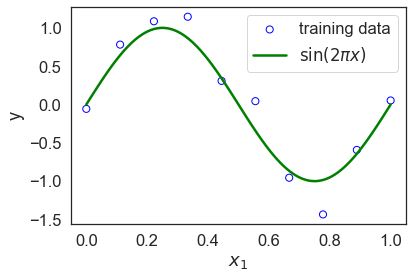

In [86]:
num_samples = 10
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)


## Polynomial model

Let's train a polynomial model on this data

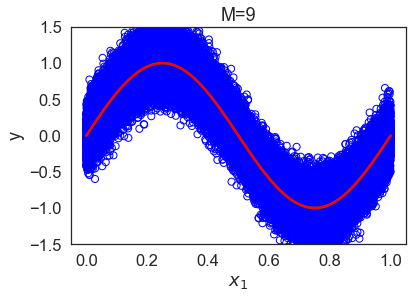

In [104]:
degree = 9
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualise_model_fit(X, y, lin_reg, degree)

Let's train multiplle polynomial regression models with different degree.

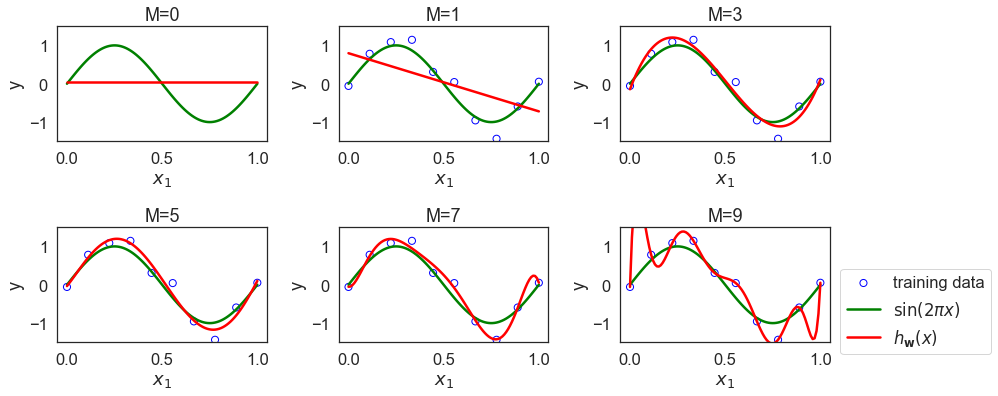

In [88]:
f = plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)
    visualise_model_fit(X, y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

### Model Selection

* One polynomial model per degree. Which one to select?
* Process
    * Fix the list of degrees you want to experiment with.
    * Divide the training data into training, validation and test.
    * For each degree $m$:
        * Train polynomial regression model with training data
        * Calculate training and validation errors on the trained model
    * Select the model with the lowest training and validation loss among all models

In [89]:
import pandas as pd

def convert_dict_to_df(w_dict, degree):
    poly_w_dict = {i: np.array(np.zeros(degree)) for i in range(degree)}
    for deg in poly_w_dict:
        weight_vec = w_dict[deg]
        for i in range(len(weight_vec)):
            poly_w_dict[deg][i] = weight_vec[i]
    
    poly_w_df = pd.DataFrame(poly_w_dict)
    poly_w_df.columns = ['w_' + str(i) for i in range(degree)]
    return poly_w_df

def plot_model_selection(training_errors, val_errors):
    plt.plot(training_errors, 'o-', mfc="none", mec="b", ms = "10", c="b", label = "Training error")
    plt.plot(val_errors, 'o-', mfc="none", mec="r", ms = "10", c="r", label="Validation error" )
    plt.legend()
    plt.xlabel("degree")
    plt.xlabel('RMSE')
    plt.show()

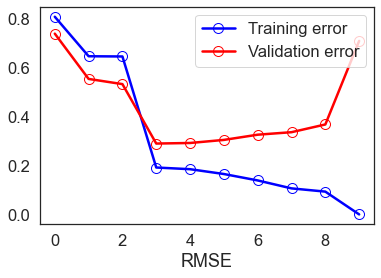

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,0.037823,0.795973,0.737967,-0.144720,-0.090694,-0.034373,-0.067341,-0.052493,-0.055525,-0.056859
1,0.000000,-1.516301,-1.124758,13.408047,11.382062,6.251277,15.048675,-1.008727,20.692123,159.989737
2,0.000000,0.000000,-0.391543,-38.693837,-28.462613,14.305659,-94.230195,170.729507,-266.899215,-3484.431419
3,0.000000,0.000000,0.000000,25.534863,9.124385,-111.767266,355.381227,-1215.860073,2084.989371,31066.485139
4,0.000000,0.000000,0.000000,0.000000,8.205239,146.774443,-755.978755,3686.801901,-8765.470260,-144916.673707
5,0.000000,0.000000,0.000000,0.000000,0.000000,-55.427682,747.587060,-5731.282018,20193.151836,391119.601775
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-267.671580,4434.085235,-25811.087595,-633180.686801
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1343.359090,17174.093663,606284.880073
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4629.363188,-316311.824594
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69262.769201


In [90]:
training_errors = []
val_errors = []
w_dict = {}

X_val = np.linspace(0, 1, 100)
y_val = nonlin(X_val)

for i in range(10):
    X_transform = polynomial_transform(X, i)
    X_val_transform = polynomial_transform(X_val, i)

    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)

    w_dict[i] = lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform, y))
    val_errors.append(lin_reg.rmse(X_val_transform, y_val + np.random.normal(scale=0.25, size=len(y_val))))

plot_model_selection(training_errors, val_errors)
convert_dict_to_df(w_dict, 10)

Observations:

* Higher order polynomial terms are assigned larger weights. The larger weights are problematic as a small change in the input causes a large change in the input.


Let's try increasing the data

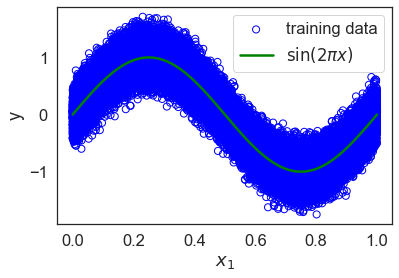

In [99]:
num_samples = 100000
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)


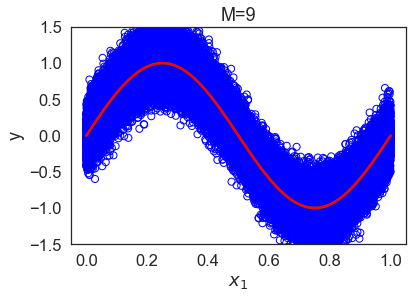

In [100]:
degree = 9
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualise_model_fit(X, y, lin_reg, degree)

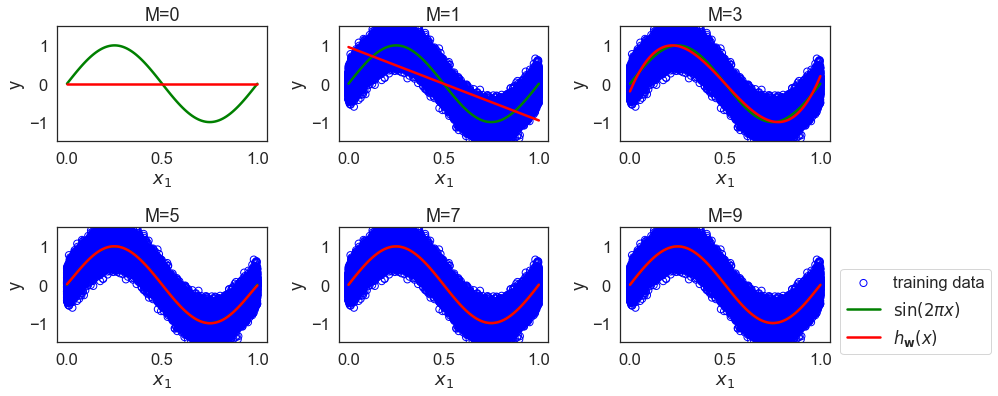

In [101]:
f = plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)
    visualise_model_fit(X, y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

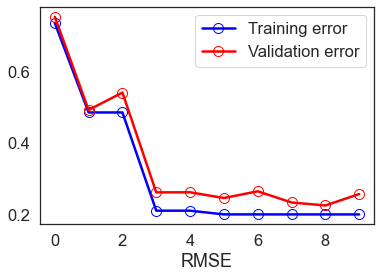

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,-0.000343,0.956234,0.955504,-0.200718,-0.201194,0.015364,0.017845,-0.000013,-0.002720,-0.001157
1,0.000000,-1.913155,-1.908774,11.966237,11.975765,5.478567,5.374339,6.374527,6.569448,6.428726
2,0.000000,0.000000,-0.004381,-34.692084,-34.734960,10.746341,11.788653,-1.714448,-5.125752,-2.029651
3,0.000000,0.000000,0.000000,23.125135,23.191833,-98.092547,-102.261847,-27.243246,-2.226391,-31.124266
4,0.000000,0.000000,0.000000,0.000000,-0.033349,136.411920,144.229400,-62.073609,-155.888036,-15.008428
5,0.000000,0.000000,0.000000,0.000000,0.000000,-54.578107,-61.457504,235.620117,430.755490,36.288644
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.293132,-212.263285,-439.922033,217.526466
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.301834,200.684939,-443.348198
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.845776,307.297255
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-76.031785


In [102]:
training_errors = []
val_errors = []
w_dict = {}

X_val = np.linspace(0, 1, 100)
y_val = nonlin(X_val)

for i in range(10):
    X_transform = polynomial_transform(X, i)
    X_val_transform = polynomial_transform(X_val, i)

    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)

    w_dict[i] = lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform, y))
    val_errors.append(lin_reg.rmse(X_val_transform, y_val + np.random.normal(scale=0.25, size=len(y_val))))

plot_model_selection(training_errors, val_errors)
convert_dict_to_df(w_dict, 10)